In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [5]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [6]:
price = data['price'].values.reshape(-1,1)

In [7]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price.ravel(), test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
max_iter = 10

In [11]:
ridge_sim_model = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=1.0,  # alpha for SGD is similar to lambda in Ridge
    max_iter=max_iter,
    random_state=42,
    warm_start=True, # Warm_start lets you continue training the model
    verbose=0 # verbose=1 prints loss every epoch
)

In [12]:
loss_history = []
num_epochs = 10

In [13]:
for i in range(num_epochs):
    ridge_sim_model.fit(X_train_scaled, y_train)
    y_pred_train = ridge_sim_model.predict(X_train_scaled)
    current_loss = mean_squared_error(y_train, y_pred_train)
    print(f"Epoch {i+1}, Training Loss (MSE): {current_loss:.4f}")
    loss_history.append(current_loss)

Epoch 1, Training Loss (MSE): 1169884905339.1411
Epoch 2, Training Loss (MSE): 1137062325422.5212
Epoch 3, Training Loss (MSE): 1137062987297.5688
Epoch 4, Training Loss (MSE): 1137062989086.8743
Epoch 5, Training Loss (MSE): 1137062989091.2271
Epoch 6, Training Loss (MSE): 1137062989091.2378
Epoch 7, Training Loss (MSE): 1137062989091.2378
Epoch 8, Training Loss (MSE): 1137062989091.2378
Epoch 9, Training Loss (MSE): 1137062989091.2378
Epoch 10, Training Loss (MSE): 1137062989091.2378


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

def evaluate_modelp(model, X, y):
    y_pred = model.predict(X)
    mse = mean_absolute_percentage_error(y, y_pred)
    return mse

In [ ]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train:.4f}')

mse_test = evaluate_model(model, X_test, y_test)
print(f'Test MSE: {mse_test:.4f}')

mse_test = evaluate_modelp(model, X_test, y_test)
print(f'Test Percentage Error: {mse_test*100:.4f}')

Training MSE: 1881012765.5472
Test MSE: 1819604267.6574


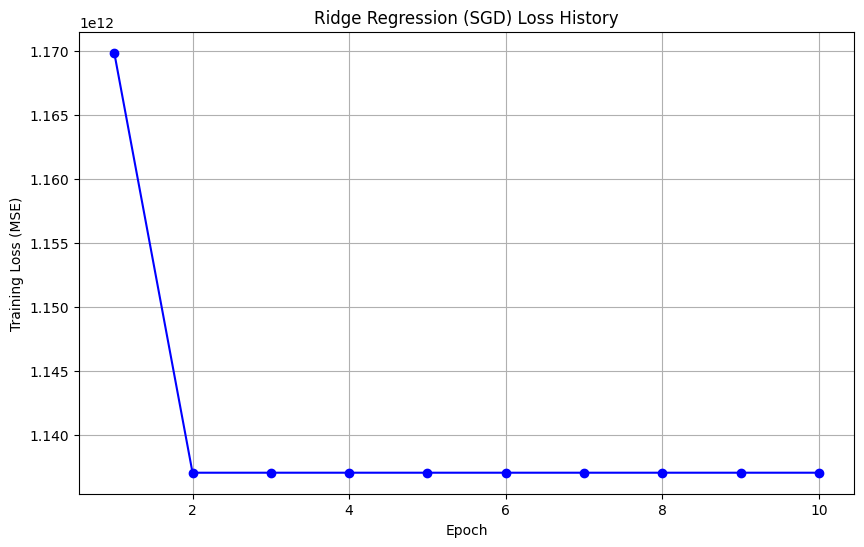

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o', color='blue')
plt.title("Ridge Regression (SGD) Loss History")
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.grid(True)
plt.show()

In [ ]:
y_test_pred = ridge_sim_model.predict(X_test_scaled)
for i in range(len(y_test_pred)):
    print(f"Predicted: {y_test_pred[i]:.2f}, Actual: {y_test[i]:.2f}")

Predicted: 2804315.04, Actual: 2408000.00
Predicted: 3734670.72, Actual: 1750000.00
Predicted: 4932747.91, Actual: 5810000.00
Predicted: 3283968.82, Actual: 1750000.00
Predicted: 5141109.94, Actual: 5950000.00
Predicted: 3777449.64, Actual: 2520000.00
Predicted: 4302583.66, Actual: 4235000.00
Predicted: 3385312.91, Actual: 2450000.00
Predicted: 6286643.08, Actual: 8890000.00
Predicted: 2850092.08, Actual: 3255000.00
Predicted: 3783602.66, Actual: 2870000.00
Predicted: 6285968.87, Actual: 8190000.00
Predicted: 4981724.48, Actual: 2660000.00
Predicted: 6185250.97, Actual: 6685000.00
Predicted: 5381482.20, Actual: 4193000.00
Predicted: 5792700.31, Actual: 6790000.00
Predicted: 6413294.36, Actual: 5250000.00
Predicted: 4643132.74, Actual: 3773000.00
Predicted: 4129825.12, Actual: 4403000.00
Predicted: 3430564.32, Actual: 2660000.00
Predicted: 5234486.49, Actual: 6650000.00
Predicted: 4567120.40, Actual: 2940000.00
Predicted: 3346717.79, Actual: 3360000.00
Predicted: 3251381.77, Actual: 335

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse**0.5:.2f}")

Mean Squared Error (MSE): 1259431.53


In [ ]:
pltYTestPred = []
pltYTest = []
testChange = []
for i in range(len(y_test_pred)):
  pltYTestPred.append(y_test_pred[i])
  pltYTest.append(y_test[i])
  testChange.append(y_test_pred[i] - y_test[i])



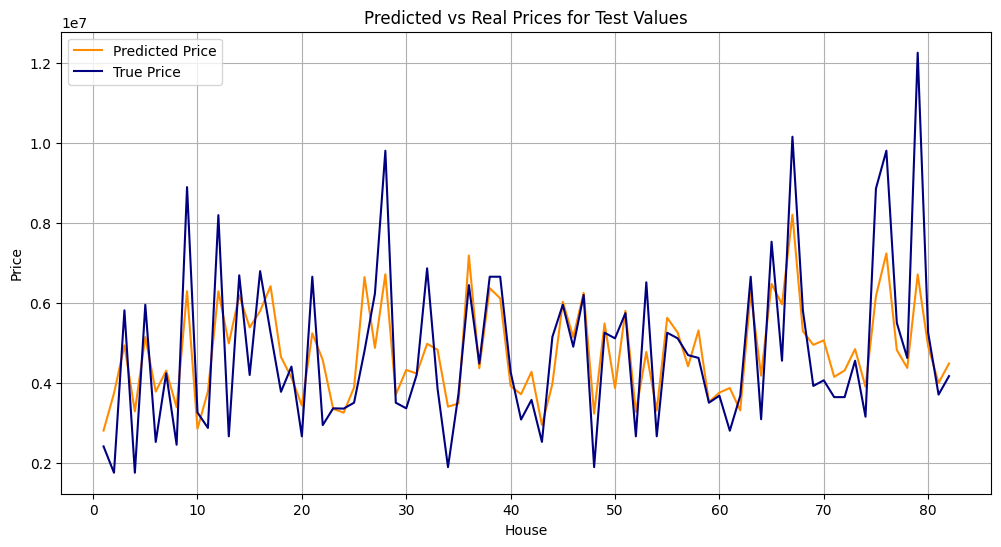

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Predicted vs Real Prices for Test Values")
plt.xlabel("House")
plt.ylabel("Price")
testRange = range(1, len(pltYTestPred)+1)
plt.plot(testRange, pltYTestPred, label="Predicted Price", color="darkorange")

plt.plot(testRange, pltYTest, label="True Price",
             color="navy")

plt.legend(loc="best")
plt.grid(True)
plt.show()

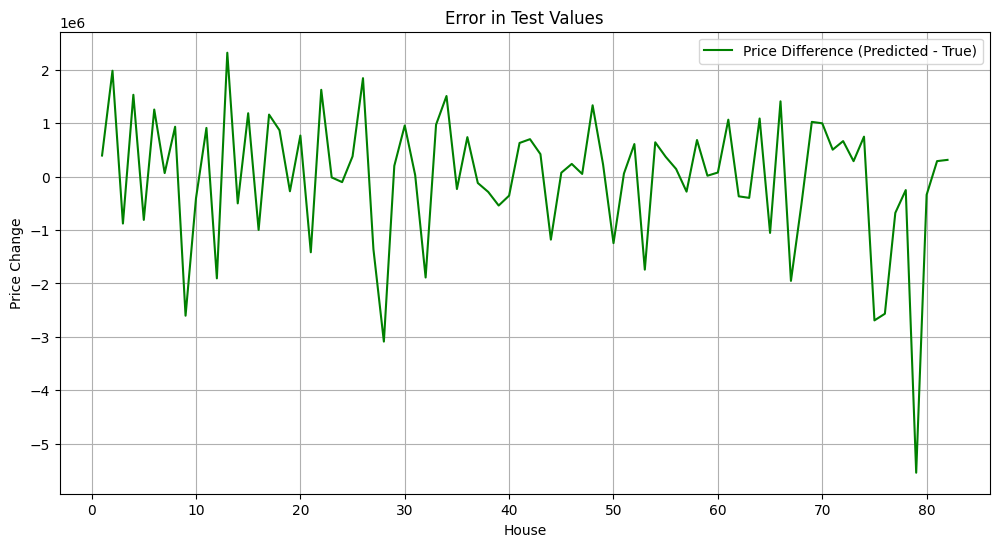

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Error in Test Values")
plt.xlabel("House")
plt.ylabel("Price Change")

plt.plot(testRange, testChange, label="Price Difference (Predicted - True)",
             color="green")

plt.legend(loc="best")
plt.grid(True)
plt.show()